In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)


In [8]:
df=pd.read_csv(r'C:\Users\Anjali\StudentsPerformance - Copy.csv')
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [9]:
df.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [10]:
df.tail(3)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [11]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [15]:
df=df.drop(['race/ethnicity','lunch'],axis=1)
df.head(5)

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [16]:
df=df.rename(columns={"parental level of education":"parent edu"})
df.head(5)

,gender,parent edu,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [17]:
df.shape

(1000, 6)

In [20]:
duplicated_rows=df[df.duplicated()]
duplicated_rows.shape

(2, 6)

In [21]:
df.count

<bound method DataFrame.count of      gender          parent edu test preparation course  math score  \
0    female   bachelor's degree                    none          72   
1    female        some college               completed          69   
2    female     master's degree                    none          90   
3      male  associate's degree                    none          47   
4      male        some college                    none          76   
..      ...                 ...                     ...         ...   
995  female     master's degree               completed          88   
996    male         high school                    none          62   
997  female         high school               completed          59   
998  female        some college               completed          68   
999  female        some college                    none          77   

     reading score  writing score  
0               72             74  
1               90             88  
2     

In [22]:
df=df.drop_duplicates()
df.head(5)

,gender,parent edu,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75


In [23]:
df.count

<bound method DataFrame.count of      gender          parent edu test preparation course  math score  \
0    female   bachelor's degree                    none          72   
1    female        some college               completed          69   
2    female     master's degree                    none          90   
3      male  associate's degree                    none          47   
4      male        some college                    none          76   
..      ...                 ...                     ...         ...   
995  female     master's degree               completed          88   
996    male         high school                    none          62   
997  female         high school               completed          59   
998  female        some college               completed          68   
999  female        some college                    none          77   

     reading score  writing score  
0               72             74  
1               90             88  
2     

In [25]:
print(df.isnull().sum())

gender                     0
parent edu                 0
test preparation course    0
math score                 0
reading score              0
writing score              0
dtype: int64


In [26]:
df=df.dropna()
df.count()

gender                     998
parent edu                 998
test preparation course    998
math score                 998
reading score              998
writing score              998
dtype: int64

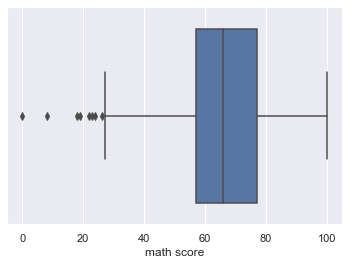

In [27]:
sns.boxplot(x=df['math score'])

In [29]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)



math score       20.00
reading score    20.00
writing score    21.75
dtype: float64


In [30]:
df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(986, 6)

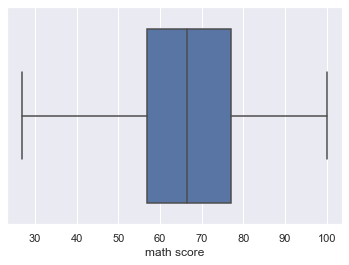

In [31]:
sns.boxplot(x=df['math score'])


In [ ]:
fig,ax=plt.subplots()
ax.scatter(df['gender'],df['reading score'])
ax.set_xlabel('gender')
ax.set_ylabel('reading score')
plt.show()